In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from pylab import *
import shutil

In [3]:
train = pd.read_csv("titanic.csv")
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


How many have Survived?
0    0.616162
1    0.383838
Name: Survived, dtype: float64


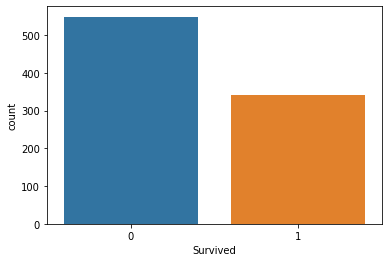

In [5]:
%matplotlib inline
print("How many have Survived?")
print(train.Survived.value_counts(normalize=True))
count_plt = sns.countplot(train.Survived)
count_plt.get_figure().savefig("Survived_count.png")

In [6]:
train['Name_title'] = train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
print('Title Count')
print(train['Name_title'].value_counts())
print('Survived by Title')
print(train['Survived'].groupby(train['Name_title']).mean())

Title Count
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Major.         2
Mlle.          2
Ms.            1
Don.           1
Lady.          1
Jonkheer.      1
Sir.           1
Capt.          1
the            1
Mme.           1
Name: Name_title, dtype: int64
Survived by Title
Name_title
Capt.        0.000000
Col.         0.500000
Don.         0.000000
Dr.          0.428571
Jonkheer.    0.000000
Lady.        1.000000
Major.       0.500000
Master.      0.575000
Miss.        0.697802
Mlle.        1.000000
Mme.         1.000000
Mr.          0.156673
Mrs.         0.792000
Ms.          1.000000
Rev.         0.000000
Sir.         1.000000
the          1.000000
Name: Survived, dtype: float64


In [7]:
train['Name_len'] = train['Name'].apply(lambda x: len(x))
print("Survived by Name Length")
print(train['Survived'].groupby(pd.qcut(train['Name_len'],5)).mean())

Survived by Name Length
Name_len
(11.999, 19.0]    0.220588
(19.0, 23.0]      0.301282
(23.0, 27.0]      0.319797
(27.0, 32.0]      0.442424
(32.0, 82.0]      0.674556
Name: Survived, dtype: float64


In [10]:
print('Survived by Sex')
print(train['Survived'].groupby(train['Sex']).mean())

Survived by Sex
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [11]:
train['Cabin_Letter'] = train['Cabin'].apply(lambda x: str(x)[0])
print("Survived by Cabin Letter")
print(train['Survived'].groupby(train['Cabin_Letter']).mean())

Survived by Cabin Letter
Cabin_Letter
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: Survived, dtype: float64


Survived by Embarked
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


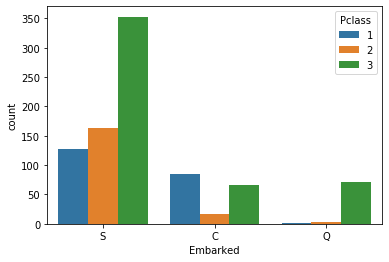

In [12]:
print("Survived by Embarked")
print(train['Survived'].groupby(train['Embarked']).mean())
count_plot = sns.countplot(train['Embarked'], hue=train['Pclass'])
count_plot.get_figure().savefig("Survived_count_by_Embarked.png")

## Data Engineering

Since we are using only length of name and we need only title we delete name and get len and title using below function

In [14]:
def create_name_feat(train):
    for i in [train]:
        i['Name_len'] = i['Name'].apply(lambda x: len(x))
        i['Name_Title'] = i['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
        del i['Name']
    return train

In [15]:
def age_impute(train):
    for i in [train]:
        i['Age_Null_Flag'] = i['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
        data = train.groupby(['Name_Title','Pclass'])['Age']
        i['Age'] = data.transform(lambda x: x.fillna(x.mean()))
    return train

In [16]:
def family_size(train):
    for i in [train]:
        i['Family_Size'] = np.where((i['SibSp']+i['Parch'])==0, 'One',
                           np.where((i['SibSp']+i['Parch'])<=3, 'Small','Big'))
        del i['SibSp']
        del i['Parch']
    return train

In [17]:
def ticket_grouped(train):
    for i in [train]:
        i['Ticket_Letr'] = i['Ticket'].apply(lambda x: str(x)[0])
        i['Ticket_Letr'] = i['Ticket_Letr'].apply(lambda x: str(x))
        i['Ticket_Letr'] = np.where((i['Ticket_Letr']).isin(['1','2','3','S','P','C','A']),
                                   i['Ticket_Letr'], np.where((i['Ticket_Ltr']).
                                                             isin(['W','4','7','6','L','5','8'])))
        i['Ticket_Letr'] = i['Ticket_Letr'].apply(lambda x: len(x))  
        del i['Ticket']
        return train

In [18]:
def cabin(train):
    for i in [train]:
        i['Cabin_Letter'] = i['Cabin'].apply(lambda x: str(x)[0])
        del i['Cabin']
    return train

In [19]:
def embarked_impute(train):
    for i in [train]:
        i['Embarked'] = i['Embarked'].fillna('S')
    return train

In [ ]:
def dummies(train, columns = ['Pclass','Sex','Embarked','Ticket_Letr','Cabin_Letter','Name_Title','Family_Size']):
    
    for column in columns:
        train[column] = train[column].apply(lambda x: str(x))
        good_cols = [column+'_'+i for i in train[column].unique() if i in]
    